# Phân tích ROC và hơn thế nữa

Trong bài này, Nhi tái lập và mở rộng kết quả của nghiên cứu "Decreased Ovarian Reserve Predicts
Inexplicability of Recurrent Miscarriage? A Retrospective Analysis" của Sophie Pills và cs. đăng trên tờ PlosOne năm 2016;

Pils S, Promberger R, Springer S, Joura E, Ott J (2016) Decreased Ovarian Reserve Predicts
Inexplicability of Recurrent Miscarriage? A Retrospective Analysis. PLoS ONE 11(9): e0161606. doi:10.1371/journal.pone.0161606

Trong bài báo, các tác giả đặt ra 3 mục tiêu: (i) Khảo sát các thông số dự trữ buồng trứng, gồm AMH, FSH,LH, Estradiol và tuổi; (ii) So sánh (đặc tính) của các thông số trên giữa nhóm phụ nữ sẩy thai liên tục rõ và không rõ nguyên nhân (IRM); và (iii) khảo nghiệm những thông số này như yếu tố tiên lượng sự hiện diện của nguy cơ sẩy thai liên tục không rõ nguyên nhân (IRM).

Mục tiêu thứ 3 có thể diễn đạt theo một cách khác: nhằm khảo sát khả năng phân lập nhóm phụ nữ sẩy thai liên tục (tái phát) không rõ nguyên nhân dựa vào giá trị AMH.

Với mục tiêu này, ý định của tác giả muốn sử dụng giá trị định lượng của 1 hormone đơn lẻ, thí dụ AMH như 1 thang điểm, dựa vào đó thiết lập 1 quy luật phân loại có tính chất nhị phân (2 nhãn giá trị), nhằm phát hiện đối tượng phụ nữ sẩy thai liên tục không rõ nguyên nhân (nhãn positive).

Quy trình phân tích bao gồm:

1) Mô tả trực quan phân phối của AMH, so sánh giữa 2 nhóm phụ nữ sẩy thai liên tục với nguyên nhân xác định (nhãn negative) hoặc không (nhãn positive).

2) Xác định một ngưỡng cắt nhằm tối ưu hóa khả năng phân biệt các trường hợp có hoặc không sẩy thai tái phát

3) Vẽ biểu đồ ROC nhằm khảo sát hiệu năng phân loại của toàn thể thang đo AMH

4) Ước lượng các trị số thống kê đo lường hiệu năng phân loại của AMH tại ngưỡng cắt tối ưu.

Mã lập trình thống kê được soạn trong 2 module Binary_class.py và BCa_bootstrap.py, ta chỉ cần import là có thể sử dụng các hàm cần thiết.

In [2]:
from Binary_class import *
import seaborn as sns

freeze_support()

# Phân tích mô tả

Đầu tiên ta tải dữ liệu, cho phân tích hiện thời ta quan tâm đến 2 biến: AMH là một biến định lượng liên tục, và Idiopathic RM là 1 biến nhị phân (0,1). Đây là dữ liệu đầu vào cho một bài toán phân loại nhị phân điển hình

In [3]:
df = pd.read_excel('Recur_Misc.xlsx')

df.head()

,Idiopathic RM,Age,AMH,FSH,LH,Number of miscarriages,Estradiol
0,0,41,1.50,5.0,5.5,3,47
1,1,37,0.72,4.5,8.1,4,15
2,1,28,2.04,1.6,1.8,3,11
3,0,39,0.45,20.1,49.2,4,37
4,0,40,0.82,4.3,9.8,5,11


Nhi giải quyết mục tiêu thứ nhất : So sánh đặc tính phân bố của 5 thông số giữa 2 nhóm Có và không có IRM

In [6]:
df.groupby('Idiopathic RM')['AMH','FSH','LH','Estradiol','Age'].describe(percentiles = [0.05,0.95]).T

Idiopathic RM             0          1
AMH       count   78.000000  66.000000
          mean     1.937308   1.518333
          std      1.063326   1.278702
          min      0.010000   0.010000
          5%       0.255000   0.155000
          50%      1.965000   1.190000
          95%      3.593000   3.715000
          max      4.580000   7.290000
FSH       count   78.000000  66.000000
          mean     6.343590   8.072727
          std      4.852703   9.409791
          min      0.800000   1.400000
          5%       2.255000   2.050000
          50%      5.100000   5.600000
          95%     16.960000  18.125000
          max     32.800000  55.100000
LH        count   78.000000  66.000000
          mean    10.534615  10.186364
          std     15.250726  12.112624
          min      0.100000   0.200000
          5%       1.855000   1.800000
          50%      6.350000   6.500000
          95%     49.605000  29.500000
          max    102.700000  72.200000
Estradiol count   78.000000  66.000000
          mean    46.602564  37.287879
          std     20.973291  16.304568
          min     10.000000  11.000000
          5%      17.850000  14.000000
          50%     42.500000  36.500000
          95%     87.750000  64.000000
          max     97.000000  79.000000
Age       count   78.000000  66.000000
          mean    32.743590  32.878788
          std      6.063379   6.436710
          min     20.000000  20.000000
          5%      22.700000  21.250000
          50%     32.500000  33.000000
          95%     42.150000  42.000000
          max     43.000000  44.000000

In [22]:
df.columns

Index(['Idiopathic RM', 'Age', 'AMH', 'FSH', 'LH', 'Number of miscarriages',
       'Estradiol', 'Class'],
      dtype='object')

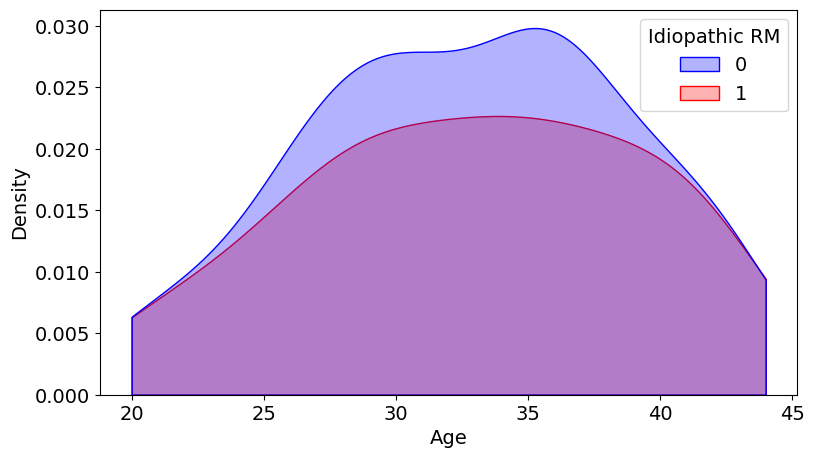

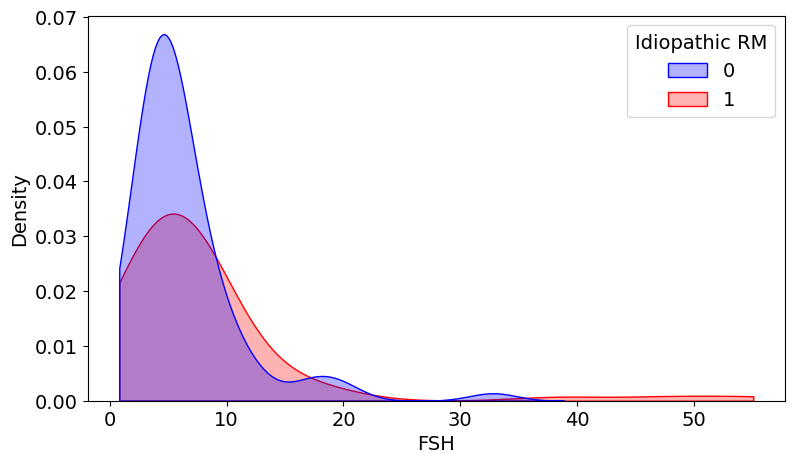

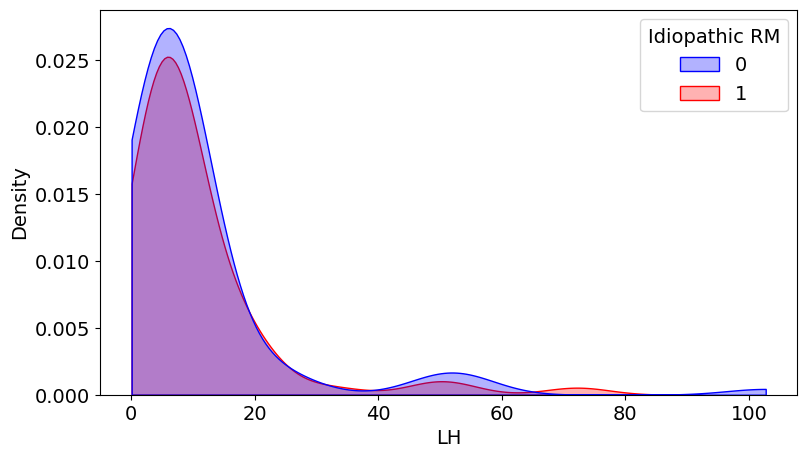

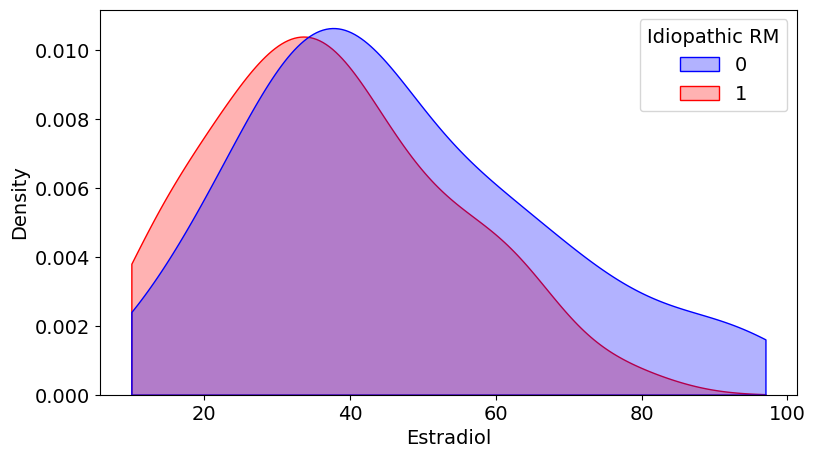

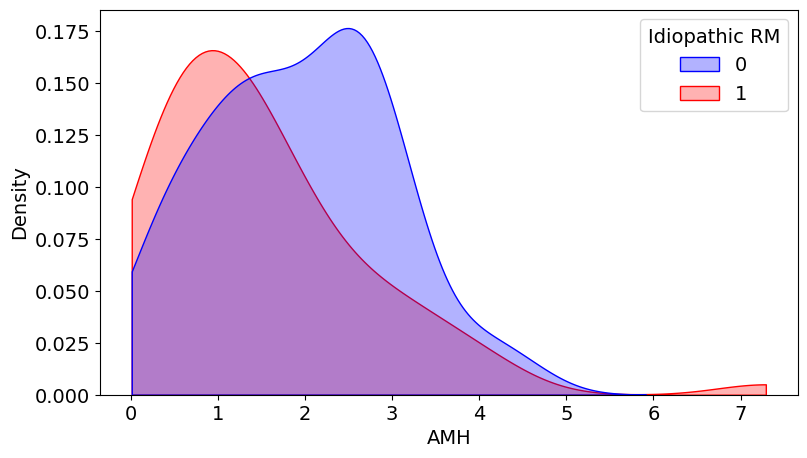

In [23]:
for k in ['Age', 'FSH', 'LH', 'Estradiol','AMH']:
    
    plt.figure(figsize=(9,5))
    sns.kdeplot(x = df[k], 
                hue = df['Idiopathic RM'],
                clip = [df[k].min(),df[k].max()],
                alpha = 0.3,
                shade = 'True',
                palette=['blue','red'],
                )

    plt.show()

Theo hình ảnh trực quan, ta có một số nhận xét như sau:

Trong 5 thông số được khảo sát, chỉ có AMH cho thấy mức độ tương phản rõ nét nhất về đặc tính phân bố giữa 2 phân nhóm; vì vậy AMH có thể là ứng cử viên tốt hơn cả cho mục tiêu phân loại.
Nhóm sẩy thai liên tục không rõ nguyên  nhân có khuynh hướng giảm giá trị AMH (lệch về bên trái thang đo), so với nhóm đối lập. Vì vậy, quy luật chẩn đoán nhị phân cần tìm sẽ có nội dung: so sánh giá trị AMH bất kì với 1 ngưỡng quyết định C trên thang đo (theo phán đoán, ngưỡng cắt tối ưu này nằm trong khoảng từ 1 – 2.5). Giá trị thấp hơn ngưỡng C (phần bên trái thang đo, AMH giảm < C) sẽ được dán nhãn Positive (nhóm IRM), giá trị cao hơn ngưỡng C (phần bên phải) sẽ nhận giá trị Negative (không phải IRM).

# Phân tích ROC và xác định ngưỡng cắt tối ưu

Trong bài này, Nhi không chỉ tái lập lại kết quả phân tích ROC của bài báo, mà còn xác định thêm ngưỡng cắt tối ưu cho AMH.

Phân tích ROC có hai ý nghĩa :

Đầu tiên, nó là một sự đánh giá hiệu năng phân loại/tiên lượng tổng quát cho toàn thể thang đo của  một đại lượng : đường cong ROC là hình ảnh tạo ra bởi tất cả cặp giá trị TPR (tỉ lệ phát hiện đúng) và FPR (tỉ lệ phát hiện nhầm/sai) của tất cả những ngưỡng cắt có thể trên toàn thang đo của AMH.

Thứ hai, phân tích ROC là một bài toán tối ưu hóa : khi đã tạo ra danh sách hiệu năng tương ứng cho tất cả những ngưỡng cắt có thể trên thang đo liên tục, ta sẽ dễ dàng xác định được ngưỡng cắt tối ưu – cho ra hiệu  năng phân loại/chẩn đoán tốt nhất ; nói cách khác, đây là ranh giới trên thang đo cho phép cắt thang đo này thành 2 khoảng riêng biệt một cách tối ưu.

Ngưỡng cắt tối ưu có thể dựa vào nhiều tiêu chí, thí dụ F1, Balanced accuracy, PPV, Sensitivity … (ý nghĩa của các chỉ số này sẽ được giải thích trong đoạn sau).

In [5]:
optim = Best_cutoff(score = df['AMH'],
                    truth = df['Idiopathic RM'],
                    rule = 'lt', # nhỏ hơn
                    balance = True)

Xác định ngưỡng cắt tối ưu theo tiêu chí max F1


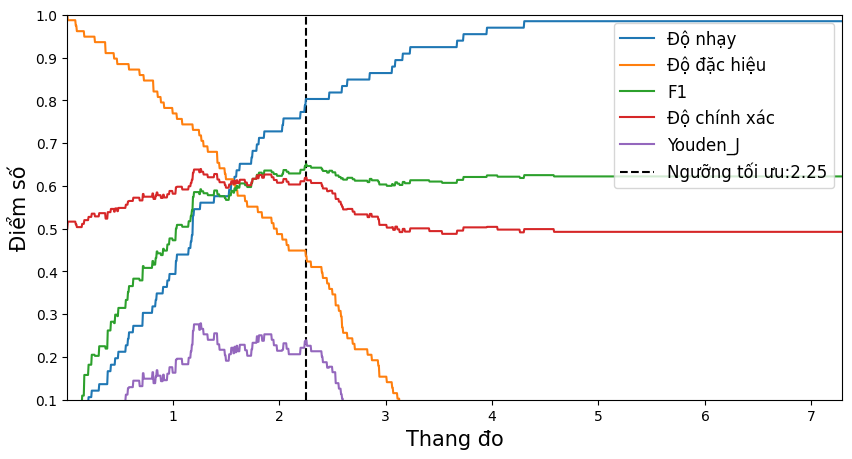

,Cutoff,Sens,Spec,F1,BAC,PPV,NPV,LRp,LRn,FPR,FNR,Youden_J
448,2.25154,0.80303,0.435897,0.650307,0.619464,0.546392,0.723404,1.423554,0.451872,0.564103,0.19697,0.238928


In [6]:
optim.optimize_cut(resolution = 0.005,
                   xmin = df['AMH'].min(), 
                   xmax = df['AMH'].max(),
                   metric = 'F1',
                   crit = 'max')

Kết quả phân tích cho thấy ngưỡng cắt tối ưu cho AMH là 2.2514, cho phép tối ưu hóa giá trị F1 = 0.65, tương ứng với Sensitivity = 0.8 và Specificity = 0.45

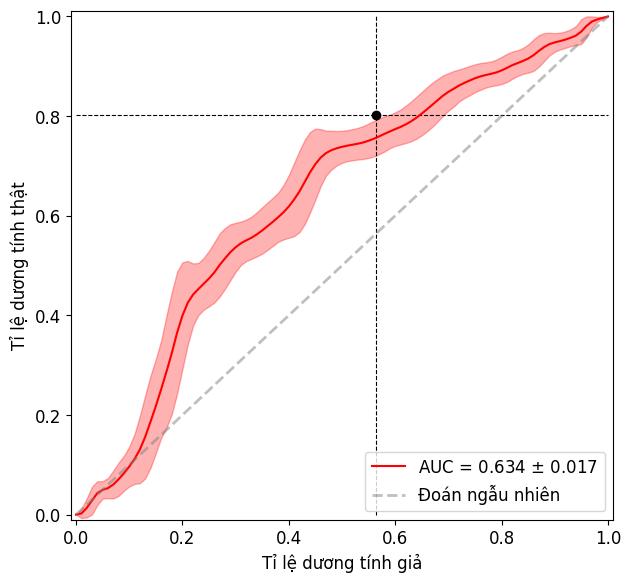

In [13]:
optim.roc_curve(n_iter = 1000, rule ='lt')

# Đánh giá hiệu năng của quy luật phân loại

Hiệu năng của quy luật nhị phân có thể được đánh giá bằng nhiều tiêu chí và hình thức khác nhau. 

**Confusion matrix**

Ta có thể dùng Confusion matrix (tạm dịch: ma trận tương hợp/nhầm lẫn): bản chất của nó là 1 bảng chéo 2x2, trình bày tỷ lệ tương hợp và bất xứng giữa Thực tế và kết quả phân loại của quy luật cần kiểm tra, hay nói cách khác, là phân bố của 4 tổ hợp  phân bố của 4 tổ hợp TP (True Positive: phát hiện đúng), TN (True Negative: loại trừ đúng), FP (False positive: phát hiện nhầm) và FN (False negative: loại trừ nhầm). Đây là một hình thức trình bày kết quả đơn giản nhưng lại cung cấp lượng thông tin rất lớn.

Thực vậy, đường chéo của confusion matrix cho ta thấy ngay lập tức giá trị của độ nhạy (Sensitivity, góc dưới phải), và độ đặc hiệu (Specificity: góc trên trái). 

Hơn nữa, TP,TN,FP,FN là 4 chỉ số cơ bản, từ đó cho phép suy ra kết quả của hầu hết những chỉ số khác. Do đó chỉ cần trình bày confusion matrix, ta cung cấp cho người đọc tất cả thông tin cần thiết để tính tất cả những chỉ số quy ước nhằm đánh giá hiệu năng phân loại.

Lưu ý: Nhi không dùng thuật ngữ: Dương tính/Âm tính (Positive/negative), "Thật và Giả", như một số tài liệu thống kê hay dùng; Cách diễn đạt này không rõ nghĩa vì Positive hay Negative chỉ là tên gọi của 2 nhãn giá trị, mang tính quy ước và có ý nghĩa tương đối tùy theo mục tiêu của người dùng, chính hành động phân loại mới có ý nghĩa. Như vậy, Positive dùng cho điều ta quan tâm tìm kiếm/cần phát hiện, và Negative cho hành động loại trừ (thứ còn lại).

Do đó, Nhi dịch TP là “chẩn đoán/phát hiện đúng/trúng”, TN là “loại trừ đúng”, FP là “chẩn đoán/phát hiện nhầm/sai”, FN là “bỏ sót, loại trừ nhầm/sai”.

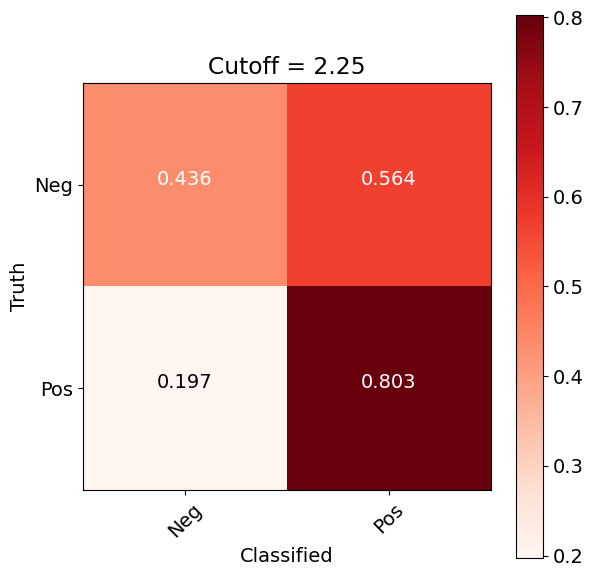

In [13]:
df['Class'] = binary_rule(score = df['AMH'], cutoff = 2.25154, rule = 'lt')

cmat = make_confusion_mat(truth = df['Idiopathic RM'], pred=df['Class'], normalize = False)

plot_confusion_matrix(cm = cmat, 
                      classes = ['Neg','Pos'], 
                      normalize = True, 
                      title = 'Cutoff = 2.25', 
                      cmap = plt.cm.Reds
)

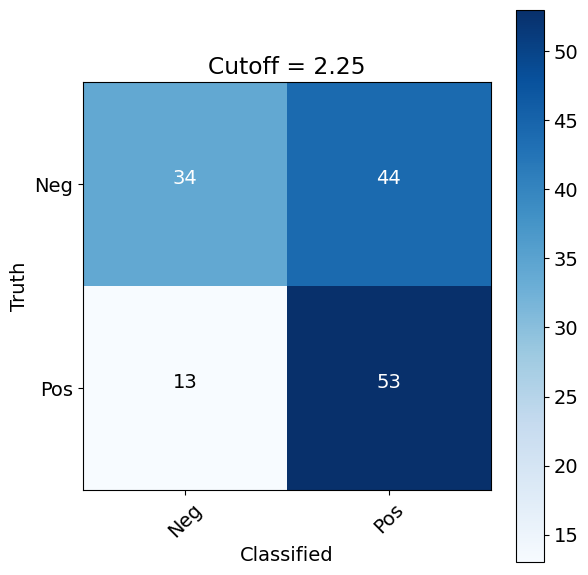

In [15]:
plot_confusion_matrix(cm = cmat, 
                      classes = ['Neg','Pos'], 
                      normalize = False, 
                      title = 'Cutoff = 2.25', 
                      cmap = plt.cm.Blues
)

Hiệu năng của quy luật phân loại bao gồm nhiều yếu tố và có những chỉ số tương ứng như sau :
    
**Tính hữu dụng**

**Sensitivity – Độ nhạy**

Chỉ số này đo lường khả năng phát hiện đúng cá thể Positive khi áp dụng quy luật cho một quần thể chứa toàn đối tượng Positive. Như vậy, Sensitivity chính là True positive rate (TPR) :

$$TPR = Sensitivity = \frac{TP}{TP+FN} = \frac{TP}{\sum Positive}$$

**Specificity - Độ đặc hiệu**

Đo lường khả năng loại trừ đúng cá thể Negative, khi áp dụng quy luật cho một tập hợp toàn bộ đều thuộc loại Negative; như vậy Specificity chính là True negative rate (TNR)

$$TNR = Specificity = \frac{TN}{TN+FP} = \frac{TN}{\sum Negative}$$

Có hai nhận xét thú vị như sau

Sensitivity và Specificity có tính chất giao hoán. Chúng chỉ mang ý nghĩa tương đối vì được quy ước bởi mục tiêu của hành động phân loại (điều ta muốn xác nhận/loại trừ). Sensitivity và Specificity luôn phải đi cặp với nhau, vì chúng bổ sung cho nhau. 

Thông thường, trong y học người bác sĩ thường muốn phát hiện bất thường/bệnh lý (và loại trừ trạng thái bình thường) – tuy nhiên sự thay đổi bất thường của một marker có thể biểu hiện theo 2 chiều (tăng hoặc giảm so với 1 ngưỡng cắt), tùy vai trò sinh lý bệnh học của marker đó:. Thí dụ:trong bệnh lý Tiền Sản giật, giá trị bất thường của Placental protein 13 là gia tăng, trong khi bất thường của placental growth factor (PIGF) lại  là giảm.

Trong bài toán này, nhãn Positive được gán cho phần bên trái ngưỡng cắt (AMH giảm thấp hơn 2.25), tương ứng với nhóm sẩy thai liên tục không rõ nguyên nhân. Nếu người bác sĩ quan tâm hơn đến nhóm còn lại, positive và negative sẽ hoán đổi vị trí cho nhau, lúc đó sensitivity và specificity sẽ hoán đổi cho nhau. Nói cách khác, giá trị Specificity cho nhãn Positive tương đương với giá trị Sensitivity cho nhãn Negative và ngược lại.

Vì được định nghĩa và áp dụng riêng biệt cho nhóm Positive hoặc Negative, 2 chỉ số Sensitivity và Specificity không bị chi phối bởi tỷ lệ phân bố của 2 loại này trong quần thể tổng quát ; nói cách khác, đây thực sự là những chỉ số đặc trưng cho quy luật phân loại (Độ nhạy và đặc hiệu của một xét nghiệm chẩn đoán sẽ không thay đổi dù áp dụng cho bất cứ quần thể đích nào, nó không bị ảnh hưởng bởi tỷ suất hiện diện của bệnh lý trong quần thể đó).

**Tính chính xác (tổng quát):**

Acuracy, hay “độ chính xác tổng quát” là tiêu chí phổ biến (thường được báo cáo) khi kiểm định hiệu năng của quy luật phân loại/xét nghiệm chẩn đoán, tuy nhiên ý nghĩa thực dụng của nó kém vì nó không đặc hiệu cho một mục tiêu nào cả. Accuracy đơn giản là tỉ lệ của tất cả trường hợp phân loại đúng (không phân biệt negative/positive) trên toàn bộ mẫu kiểm định.
 
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

Accuracy có thể bị sai lệch nếu có bất xứng về tỷ lệ giữa 2 nhãn Positive/Negative, do đó ta có một chỉ số khác chính xác hơn, là Balanced accuracy (BAC) hay độ chính xác cân bằng:

$$BAC = \frac{TPR+TNR}{2}$$

**Giá trị thực tiễn trên lâm sàng**

**Positive/Negative predictive value**

Nếu như sensitivity và specificity mang ý nghĩa “khảo thí” một quy luật/xét nghiệm bằng cách đưa ra 1 đề bài/mẫu kiểm định chứa toàn nhãn positive hoặc negative, thì 2 chỉ số PPV và NPV lại mang ý nghĩa thực tiễn hơn.

PPV đo lường khả năng phân loại Positive chính xác, với câu hỏi: trong số những trường hợp được phân loại là positive, bao nhiêu trường hợp là chính xác (thực sự là positive), 

$$PPV = \frac{TP}{TP+FP}$$

PPV đo lường tính “chuẩn xác”, Sensitivity đo lường tính “hữu dụng”. Mẹo để nhớ là “Dám quyết định (Sensitivity cao) và quyết định đúng (PPV cao)”

tương tự:  Negative predictive value (NPV) đo lường khả năng loại trừ chính xác: trong số những đồi tượng được dán nhãn negative, bao nhiêu trường hợp thực sự là negative ? 

$$NPV = \frac{TN}{TN+FN}$$

Nhược điểm của PPV so với Sensitivity (và NPV so với Specificity), đó là PPV và NPV bị ảnh hưởng bởi tỷ suất phân bố của 2 nhãn (bệnh lý/bình thường) trong quần thể đích. PPV không khảo sát quy luật chẩn đoán môt cách độc lập, mà đặt mô hình vào một bối cảnh (dữ liệu). Do đó ta không nói chung chung:”quy luật này chính xác”, mà là :” quy luật này chính xác đối với mẫu/dữ liệu hiện thời”.

**F1 score**

Chỉ số  F1 score cho phép đánh giá sự cân bằng giữa Sensitivity và PPV. Được định nghĩa như trung bình điều hòa (harmonic mean) giữa PPV và Sensitivity

$$F1 = \frac{2\times TP}{2\times TP+FP+FN}$$ 

$$F1 = 2\times \frac{1}{\frac{1}{Sens}+\frac{1}{PPV}}$$

$$F1 = 2\times \frac{PPV \times Sens}{PPV + Sens}$$

F1 được dùng khi ta quan tâm đồng đều vai trò của cả PPV và Sens, nói cách khác ta muốn quy luật chẩn đoán vừa Nhạy, vừa chính xác. Việc lựa chọn giữa Sensitivity và PPV tùy thuộc vào mục tiêu ứng dụng của quy luật: người bác sĩ muốn Tầm soát, phát hiện thật nhiều, thật sớm một bất thường/bệnh lý hay muốn Xác định bệnh lý đó ? Nếu xem cả 2 đều quan trọng như nhau thì F1 là tiêu chí thích hợp nhất khi kiểm định vì để F1 đạt tối ưu thì cả PPV và Sens đều phải tối ưu, ngược lại chỉ cần một trong 2 có giá trị thấp thì F1 sẽ thấp.

**Likelihood ratio positive/negative**

Tỉ số khả dĩ dương tính/âm tính : đo lường mức độ liên hệ giữa quy luật chẩn đoán và trạng thái bệnh lý. Thí dụ LR+ cao (>1) cho thấy kết quả xét nghiệm dương tính có liên hệ cao với nguy cơ hiện diện của bệnh lý. Cạnh đó, LR còn là phương tiện trung gian cho phép biện luận, so sánh hiệu năng của một xét nghiệm chẩn đoán này với một xét nghiệm khác.

Sau đây, ta ước tính tất cả những chỉ số đánh giá hiệu năng của quy luật phân loại cho AMH dựa vào ngưỡng cắt 2.25 ; kèm theo khoảng tin cập 95% bằng một quy trình bootstrap. Kết quả như sau :

In [9]:
est, bcaCI = Bootstrap_Diag_perfm(truth = df['Idiopathic RM'], 
                     pred=df['Class'],
                     alpha = 0.05,
                     n_samples = 5000,
                     n_jobs = 6)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.13it/s]


In [10]:
est

{'Sens': 0.803030303030303,
 'Spec': 0.4358974358974359,
 'FPR': 0.5641025641025641,
 'FNR': 0.19696969696969696,
 'PPV': 0.5463917525773195,
 'NPV': 0.723404255319149,
 'LRp': 1.4235537190082643,
 'LRn': 0.4518716577540108,
 'F1': 0.6503067484662576,
 'BAC': 0.6194638694638694,
 'Youden_J': 0.2389277389277389}

In [11]:
bcaCI

{'Sens_CI': array([0.7017261, 0.890625 ]),
 'Spec_CI': array([0.32542709, 0.54666667]),
 'FPR_CI': array([0.4556962 , 0.67567568]),
 'FNR_CI': array([0.11266654, 0.30084948]),
 'PPV_CI': array([0.4477768 , 0.64285714]),
 'NPV_CI': array([0.58490566, 0.8424094 ]),
 'LRp_CI': array([1.14846658, 1.80918498]),
 'LRn_CI': array([0.24451023, 0.74118334]),
 'F1_CI': array([0.55844156, 0.72625698]),
 'BAC_CI': array([0.54746628, 0.6914871 ]),
 'Youden_J_CI': array([0.09493256, 0.38297421])}